In [2]:
## Importar librerias necesarias
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import duckdb

In [3]:
periodo = 365

zona_norte_grande = """(1,2,3)"""
zona_norte_chico = """(4,5)"""
zona_nucleo_central = """(6,7,8,9,10,11,12,13,14,15,16,17)"""
zona_concepcion_frontera = """(18,19,20,21,28,29)"""
zona_region_de_los_lagos = """(22,23,24)"""
zona_region_canales = """(25,26,33)"""

lista_zonas_servicios_salud = [zona_norte_grande,
                zona_norte_chico,
                zona_nucleo_central,
                zona_concepcion_frontera,
                zona_region_de_los_lagos,
                zona_region_canales]

year = "(2019)"

lista_zonas = ["ZonaNorteGrande",
               "ZonaNorteChico",
               "ZonaNucleoCentral",
               "ZonaConcepcionLaFrontera",
               "ZonaRegionDeLosLagos",
               "ZonaRegionCanales"]

lista_zonas_legend = ["Zona Norte Grande",
               "Zona Norte Chico",
               "Zona Nucleo Central",
               "Zona Concepción y la Frontera",
               "Zona Región De Los Lagos",
               "Zona Región de los Canales"]

grupo_etario_list=["Menores_1","De_1_a_4","De_5_a_14","De_15_a_64","De_65_y_mas"]
grupo_etario_list_titles=["Menores 1","De 1 a 4","De 5 a 14","De 15 a 64","De 65 y más"]

In [4]:
# def common_filter_zona(zona):
#     return """
# FROM datos_urgencia_consolidados.parquet
# where IdCausa in (3,4,5,6,10,11)
# and year(strptime(fecha, '%d/%m/%Y')) in""" + year + """
# --and year(strptime(fecha, '%d/%m/%Y')) in (2017,2018,2019,2022,2023)
# --and year(strptime(fecha, '%d/%m/%Y')) in (2022,2023)
# and CodigoDependencia in """ + zona +"""
# --group by CodigoDependencia, fecha
# group by zona, fecha
# """ + """
# having dayofyear(strptime(fecha, '%d/%m/%Y')) <= """+ str(periodo) + """
# """

# #here CodigoDependencia indicates the "Servicio de Salud"
# #to ignote the grouping by "region"  set "CodigoRegion" to a constant and remove it from the group by
# df2 = duckdb.sql("""
# select year(strptime(fecha, '%d/%m/%Y')) as year
# --    , CodigoDependencia  as CodigoRegion
#     , dayofyear(strptime(fecha, '%d/%m/%Y')) as nrodia
#     , 'ZonaNorteGrande' as zona
#     , sum(Menores_1)  as Menores_1
#     , sum(De_1_a_4)  as De_1_a_4
#     , sum(De_5_a_14)  as De_5_a_14
#     , sum(De_15_a_64)   as De_15_a_64
#     , sum(De_65_y_mas) as De_65_y_mas
# """+ common_filter_zona(zona_norte_grande) + """
# UNION
# select year(strptime(fecha, '%d/%m/%Y')) as year
# --    , CodigoDependencia  as CodigoRegion
#     , dayofyear(strptime(fecha, '%d/%m/%Y')) as nrodia
#     , 'ZonaNorteChico' as zona
#     , sum(Menores_1)  as Menores_1
#     , sum(De_1_a_4)  as De_1_a_4
#     , sum(De_5_a_14)  as De_5_a_14
#     , sum(De_15_a_64)   as De_15_a_64
#     , sum(De_65_y_mas) as De_65_y_mas
# """+ common_filter_zona(zona_norte_chico)  + """
# UNION
# select year(strptime(fecha, '%d/%m/%Y')) as year
# --    , CodigoDependencia  as CodigoRegion
#     , dayofyear(strptime(fecha, '%d/%m/%Y')) as nrodia
#     , 'ZonaNucleoCentral' as zona
#     , sum(Menores_1)  as Menores_1
#     , sum(De_1_a_4)  as De_1_a_4
#     , sum(De_5_a_14)  as De_5_a_14
#     , sum(De_15_a_64)   as De_15_a_64
#     , sum(De_65_y_mas) as De_65_y_mas
# """+ common_filter_zona(zona_nucleo_central)  + """
# UNION
# select year(strptime(fecha, '%d/%m/%Y')) as year
# --    , CodigoDependencia  as CodigoRegion
#     , dayofyear(strptime(fecha, '%d/%m/%Y')) as nrodia
#     , 'ZonaConcepcionLaFrontera' as zona
#     , sum(Menores_1)  as Menores_1
#     , sum(De_1_a_4)  as De_1_a_4
#     , sum(De_5_a_14)  as De_5_a_14
#     , sum(De_15_a_64)   as De_15_a_64
#     , sum(De_65_y_mas) as De_65_y_mas
# """+ common_filter_zona(zona_concepcion_frontera)  + """
# UNION
# select year(strptime(fecha, '%d/%m/%Y')) as year
# --    , CodigoDependencia  as CodigoRegion
#     , dayofyear(strptime(fecha, '%d/%m/%Y')) as nrodia
#     , 'ZonaRegionDeLosLagos' as zona
#     , sum(Menores_1)  as Menores_1
#     , sum(De_1_a_4)  as De_1_a_4
#     , sum(De_5_a_14)  as De_5_a_14
#     , sum(De_15_a_64)   as De_15_a_64
#     , sum(De_65_y_mas) as De_65_y_mas
# """+ common_filter_zona(zona_region_de_los_lagos)  + """
# UNION
# select year(strptime(fecha, '%d/%m/%Y')) as year
# --    , CodigoDependencia  as CodigoRegion
#     , dayofyear(strptime(fecha, '%d/%m/%Y')) as nrodia
#     , 'ZonaRegionCanales' as zona
#     , sum(Menores_1)  as Menores_1
#     , sum(De_1_a_4)  as De_1_a_4
#     , sum(De_5_a_14)  as De_5_a_14
#     , sum(De_15_a_64)   as De_15_a_64
#     , sum(De_65_y_mas) as De_65_y_mas
# """+ common_filter_zona(zona_region_canales) + """
# """).df()



Gráfica correspondiente al año (2019)


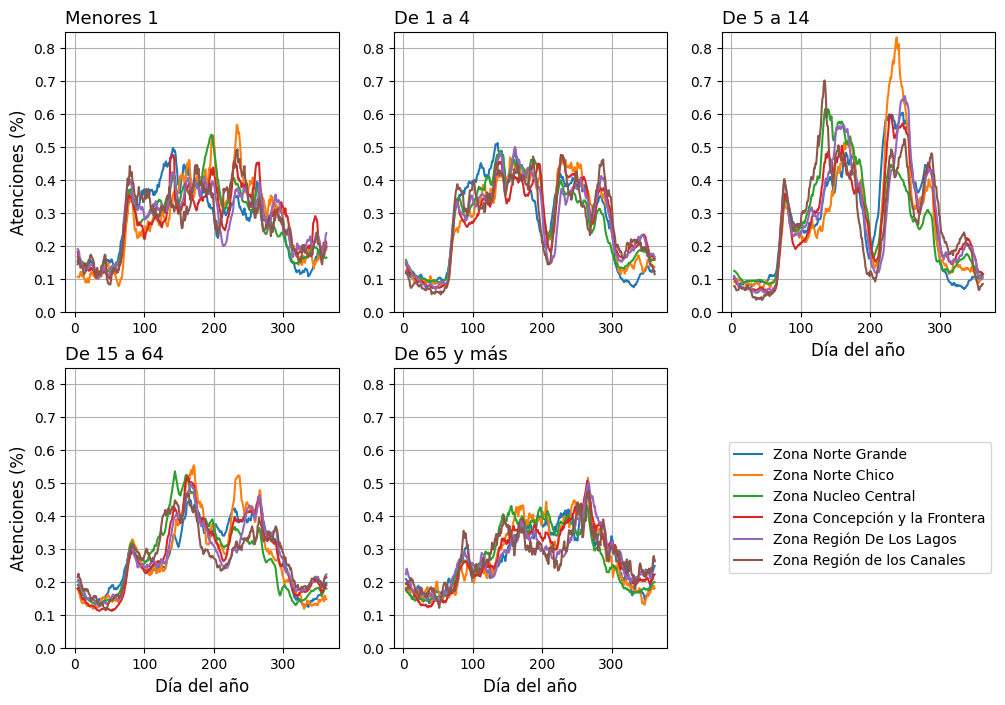

In [5]:
#Genera una comparación de las atenciones diarias correspondiente 
# a diferentes regiones geográficas. Las zonas están determinadas 
# por lo servicios de salud que las componen
# en los gráficos se muestra la información para diferentes grupos etarios


print("Gráfica correspondiente al año " + year)

#here CodigoDependencia indicates the "Servicio de Salud"
#to ignote the grouping by "region"  set "CodigoRegion" to a constant and remove it from the group by
query_list = []
for k, servicios_zona, nombre_zona in zip([k for k in range(len(lista_zonas_servicios_salud))],lista_zonas_servicios_salud,lista_zonas):
    query_list.append("""
SELECT year(strptime(fecha, '%d/%m/%Y')) as year
    , dayofyear(strptime(fecha, '%d/%m/%Y')) as nrodia 
    ,""" + "'"  + nombre_zona + "'" + """ as zona
    , sum(Menores_1)  as Menores_1
    , sum(De_1_a_4)  as De_1_a_4
    , sum(De_5_a_14)  as De_5_a_14
    , sum(De_15_a_64)   as De_15_a_64
    , sum(De_65_y_mas) as De_65_y_mas
FROM datos_urgencia_consolidados.parquet
where IdCausa in (3,4,5,6,10,11)
and year(strptime(fecha, '%d/%m/%Y')) in""" + year + """
--and year(strptime(fecha, '%d/%m/%Y')) in (2017,2018,2019,2022,2023)
and CodigoDependencia in """ + servicios_zona +"""
group by zona, fecha
having dayofyear(strptime(fecha, '%d/%m/%Y')) <= """+ str(periodo) + """
""")
    if k +1< len(lista_zonas_servicios_salud):
        query_list.append(""" UNION """)

df2 = duckdb.sql(''.join(query_list)).df()


df2 = df2.sort_values(by=['zona','year','nrodia']).reset_index(drop = True)
df3 = pd.concat([df2[["zona","year","nrodia","Menores_1"]].rename(columns={"Menores_1":"atenciones"}).assign(grupo_etario = "Menores_1"),
df2[["zona","year","nrodia","De_1_a_4"]].rename(columns={"De_1_a_4":"atenciones"}).assign(grupo_etario = "De_1_a_4"),
df2[["zona","year","nrodia","De_5_a_14"]].rename(columns={"De_5_a_14":"atenciones"}).assign(grupo_etario = "De_5_a_14"),
df2[["zona","year","nrodia","De_15_a_64"]].rename(columns={"De_15_a_64":"atenciones"}).assign(grupo_etario = "De_15_a_64"),
df2[["zona","year","nrodia","De_65_y_mas"]].rename(columns={"De_65_y_mas":"atenciones"}).assign(grupo_etario = "De_65_y_mas")
])

# ILUSTRACIÓN 1 ATENCIONES DIARIAS DE URGENCIA PARA 
# CADA DÍA DEL AÑO CORRESPONDIENTES AL PERIODO 2017 -2023 para diferentes zonas geográficas 
#fig = plt.figure(figsize = (12,14))
fig = plt.figure(figsize = (12,8))


for k in range(5):
    df4 =df3[df3["grupo_etario"]==grupo_etario_list[k]]
    ax = fig.add_subplot(2,3,k+1) 
    df_dict = {key[0]: d for key, d in df4[['zona','year','nrodia','atenciones']].groupby(['zona'])}
    ax.set_prop_cycle(color = plt.get_cmap("tab10").colors)
    for key in lista_zonas:
        plt.plot(df_dict[key]['nrodia'],100*df_dict[key]['atenciones'].rolling(7,center=True).mean()/float(sum(df_dict[key]['atenciones'])) )

    ax.set_ylim(ymin=0)
    ax.set_ylim(ymax=0.85)
    ax.grid()
    ax.set_title(str(grupo_etario_list_titles[k]) , fontsize = 13, loc='left')
    if k in (2,3,4):
        ax.set_xlabel('Día del año', fontsize = 12)
    if k in (0,3):
        ax.set_ylabel('Atenciones (%)', fontsize = 12)

#show legend in last plot space
ax = fig.add_subplot(2,3,6) 
ax.set_prop_cycle(color = plt.get_cmap("tab10").colors)
for key in lista_zonas:
   plt.plot(range(1),range(1))

ax.legend(lista_zonas_legend,loc='center left',fontsize = 10 )
ax.axis('off')
plt.savefig('fig4_urgencias_geografica_grupo_etario_2019.png', bbox_inches='tight')